In [60]:
import numpy as np

import matplotlib.pyplot as plt

from sklearn.datasets import make_moons

from sklearn.neighbors import kneighbors_graph

from sklearn.cluster import SpectralClustering

from sklearn.metrics.pairwise import rbf_kernel

from sklearn.metrics import silhouette_score

Depth 0: Cluster 1 = 99, Cluster 2 = 101, Silhouette = 0.49
Depth 1: Cluster 1 = 34, Cluster 2 = 65, Silhouette = 0.48
Depth 1: Cluster 1 = 37, Cluster 2 = 64, Silhouette = 0.49


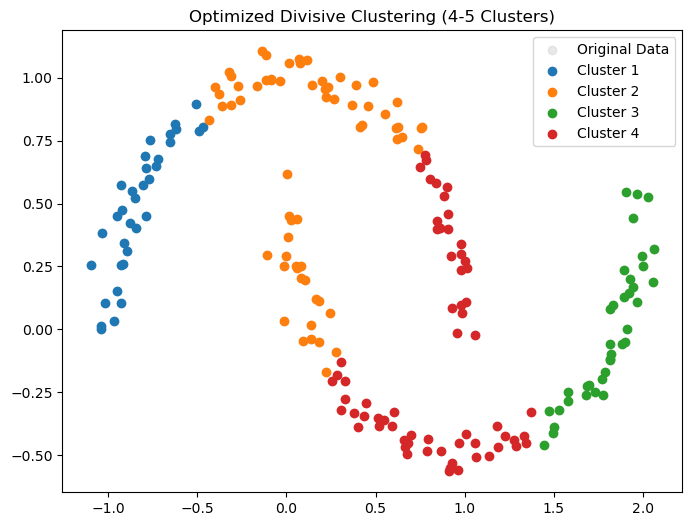

In [61]:
# Generate sample data
X, _ = make_moons(n_samples=200, noise=0.05, random_state=42)

# Recursive function for Divisive Clustering
def divisive_clustering(X, min_cluster_size=5, max_depth=2, depth=0):
    if len(X) <= min_cluster_size or depth >= max_depth:
        return [X]  # Stop if the cluster is too small or max depth reached

    # Compute RBF kernel for affinity matrix
    gamma = 1.0 / (2.0 * np.std(X) ** 2)  
    affinity_matrix = rbf_kernel(X, gamma=gamma)

    # Apply Spectral Clustering to split into 2 clusters
    clustering = SpectralClustering(n_clusters=2, affinity='precomputed', random_state=42)
    labels = clustering.fit_predict(affinity_matrix)

    # Ensure meaningful split
    if len(set(labels)) < 2:
        return [X]

    # Compute silhouette score to check if clustering is valid
    silhouette = silhouette_score(X, labels)
    
    # Calculate variance in clusters (homogeneous clusters shouldn't be split)
    cluster_1 = X[labels == 0]
    cluster_2 = X[labels == 1]
    var1, var2 = np.var(cluster_1, axis=0).sum(), np.var(cluster_2, axis=0).sum()

    if silhouette < 0.2 or (var1 < 0.01 and var2 < 0.01):  # Stop if weak clustering or too homogeneous
        return [X]

    print(f"Depth {depth}: Cluster 1 = {len(cluster_1)}, Cluster 2 = {len(cluster_2)}, Silhouette = {silhouette:.2f}")

    # Recursively divide the clusters
    return divisive_clustering(cluster_1, min_cluster_size, max_depth, depth+1) + \
           divisive_clustering(cluster_2, min_cluster_size, max_depth, depth+1)

# Run divisive clustering
clusters = divisive_clustering(X)

# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='lightgray', alpha=0.5, label="Original Data", zorder=1)

colors = plt.get_cmap("tab10")
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors(i % 10), label=f'Cluster {i+1}', zorder=2)

plt.legend()
plt.title("Optimized Divisive Clustering (4-5 Clusters)")
plt.show()


Since Scikit-Learn does not have a built-in function for Divisive Clustering, we use Spectral Clustering recursively to mimic it.

In [62]:
X, _ = make_moons(n_samples=200, noise=0.05,random_state=42)

In [63]:
# Recursive function for Divisive Clustering

def devisive_clustering(X, min_cluster_size=5,max_depth=2, depth=0):

    if len(X) <= min_cluster_size or depth >= max_depth:
        return [X]  # Stop if the cluster is too small or max depth reached
    
    
    # Compute RBF kernel for affinity matrix

    gamma = 1.0 / (2.0 * np.std(X) ** 2)  

    affinity_matrix = rbf_kernel(X, gamma=gamma)


    # Apply Spectral Clustering to split into 2 clusters

    clustering = spectral_clustering(n_clusters=2, affinity='precomputed', random_state=42)

    labels = clustering.fit_predict(affinity_matrix)

    # Ensure meaningful split
    
    if len(set(labels)) < 2:
        return [X]


    # Compute silhouette score to check if clustering is valid
    
    silhouette = silhouette_score(X, labels)
    
    # Calculate variance in clusters (homogeneous clusters shouldn't be split)

    cluster_1 = X[labels == 0]
    cluster_2 = X[labels == 1]
    var1, var2 = np.var(cluster_1, axis=0).sum(), np.var(cluster_2, axis=0).sum()

    if silhouette < 0.2 or (var1 < 0.01 and var2 < 0.01):  # Stop if weak clustering or too homogeneous
        return [X]

    print(f"Depth {depth}: Cluster 1 = {len(cluster_1)}, Cluster 2 = {len(cluster_2)}, Silhouette = {silhouette:.2f}")

    # Recursively divide the clusters
    return divisive_clustering(cluster_1, min_cluster_size, max_depth, depth+1) + \
           divisive_clustering(cluster_2, min_cluster_size, max_depth, depth+1)


clusters = devisive_clustering(X)

InvalidParameterError: The 'affinity' parameter of spectral_clustering must be an array-like or a sparse matrix. Got 'precomputed' instead.

In [ ]:
# Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], color='lightgray', alpha=0.5, label="Original Data", zorder=1)

colors = plt.get_cmap("tab10")
for i, cluster in enumerate(clusters):
    plt.scatter(cluster[:, 0], cluster[:, 1], color=colors(i % 10), label=f'Cluster {i+1}', zorder=2)

plt.legend()
plt.title("Optimized Divisive Clustering (4-5 Clusters)")
plt.show()